<a href="https://colab.research.google.com/github/sebastiangrisalesm-collab/Entregas_IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

**Info:** toca descargar el token desde kaggle y subirlo a los ficheros de colab.

# Configuración Kaggle

In [10]:
from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

Saving kaggle.json to kaggle (1).json
udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


# Descarga de Dataset

In [11]:
# Descargar los datos de la competencia
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# Cargue y Exploración del Dataset

In [13]:
df = pd.read_csv("train.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [15]:
# Tamaño del dataset
print(df.shape)

# Primeros tres registros
df.head(3)

(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


In [16]:
# Porcentaje de nulos por columna (top 10 con más nulos)
nulls = df.isna().mean().sort_values(ascending=False)
nulls.head(10).to_frame("pct_nulls").style.format("{:.1%}")

,pct_nulls
F_TIENEAUTOMOVIL,6.3%
F_TIENELAVADORA,5.7%
F_TIENECOMPUTADOR,5.5%
F_ESTRATOVIVIENDA,4.6%
E_HORASSEMANATRABAJA,4.5%
F_TIENEINTERNET.1,3.8%
F_TIENEINTERNET,3.8%
F_EDUCACIONMADRE,3.4%
F_EDUCACIONPADRE,3.3%
E_PAGOMATRICULAPROPIO,0.9%


Conteo por clase:
 RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

Porcentaje por clase (%):
 RENDIMIENTO_GLOBAL
alto          25.36
bajo          24.98
medio-bajo    24.88
medio-alto    24.78
Name: proportion, dtype: float64


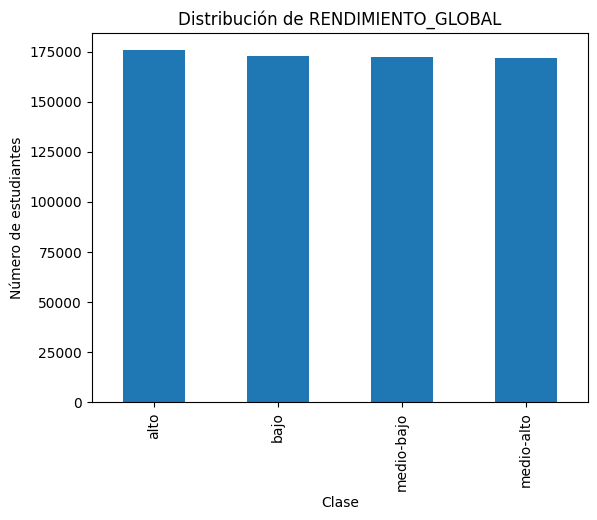

In [17]:
target_col = "RENDIMIENTO_GLOBAL"

# Conteo absoluto y relativo
vc = df[target_col].value_counts(dropna=False)
vcp = df[target_col].value_counts(normalize=True, dropna=False).mul(100).round(2)

print("Conteo por clase:\n", vc)
print("\nPorcentaje por clase (%):\n", vcp)

# Gráfico
vc.sort_values(ascending=False).plot(kind="bar")
plt.title(f"Distribución de {target_col}")
plt.xlabel("Clase")
plt.ylabel("Número de estudiantes")
plt.show()

In [18]:
# Distribuciones por “localidades” / "categorías relevantes"
cat_cols = [
    "E_PRGM_DEPARTAMENTO",
    "F_ESTRATOVIVIENDA",
    "F_TIENECOMPUTADOR",
    "F_TIENEINTERNET",     # si no existe, ignora
    "F_TIENEINTERNET.1"    # a veces hay duplicada; revisa cuál usar
]

for col in cat_cols:
    if col in df.columns:
        print(f"\n=== {col} ===")
        print(df[col].value_counts(dropna=False).head(15))


=== E_PRGM_DEPARTAMENTO ===
E_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
Name: count, dtype: int64

=== F_ESTRATOVIVIENDA ===
F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
NaN             32137
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64

=== F_TIENECOMPUTADOR ===
F_TIENECOMPUTADOR
Si     597670
No      56727
NaN     38103
Name: count, dtype: int64

=== F_TIENEINTERNET ===
F_TIENEINTERNET
Si     592514
No      73357
NaN     26629
Name: count, dtype: int64

=== F_TIENEINTERNET.1 ===
F_TIENEINTERNET.1
Si     592514
No     

In [19]:
col_geo = "E_PRGM_DEPARTAMENTO"   # ajusta si deseas otra “localidad”
if col_geo in df.columns:
    ct = pd.crosstab(df[col_geo], df[target_col])
    # Top 15 por volumen total
    ct = ct.assign(_TOTAL=ct.sum(axis=1)).sort_values("_TOTAL", ascending=False).head(15).drop(columns="_TOTAL")
    display(ct)

    # Versión porcentual por fila
    ctp = ct.div(ct.sum(axis=1), axis=0).mul(100).round(1)
    display(ctp.style.format("{:.1f}%"))

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
E_PRGM_DEPARTAMENTO,,,,
BOGOTÁ,77388,66721,69215,68835
ANTIOQUIA,25688,17217,21657,19045
VALLE,12735,10257,11136,10460
ATLANTICO,10165,11159,9484,10212
SANTANDER,9298,5178,7750,6602
NORTE SANTANDER,3096,7082,5675,6735
BOLIVAR,3816,6577,4758,5478
BOYACA,3770,2338,4440,3500
CUNDINAMARCA,5719,1979,3588,2732


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
E_PRGM_DEPARTAMENTO,,,,
BOGOTÁ,27.4%,23.6%,24.5%,24.4%
ANTIOQUIA,30.7%,20.6%,25.9%,22.8%
VALLE,28.6%,23.0%,25.0%,23.5%
ATLANTICO,24.8%,27.2%,23.1%,24.9%
SANTANDER,32.3%,18.0%,26.9%,22.9%
NORTE SANTANDER,13.7%,31.4%,25.1%,29.8%
BOLIVAR,18.5%,31.9%,23.1%,26.6%
BOYACA,26.8%,16.6%,31.6%,24.9%
CUNDINAMARCA,40.8%,14.1%,25.6%,19.5%


In [20]:
num_cols = [c for c in df.columns if c.startswith("INDICADOR_")]
df[num_cols].describe(percentiles=[.25,.5,.75]).T

,count,mean,std,min,25%,50%,75%,max
INDICADOR_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
INDICADOR_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
INDICADOR_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
INDICADOR_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


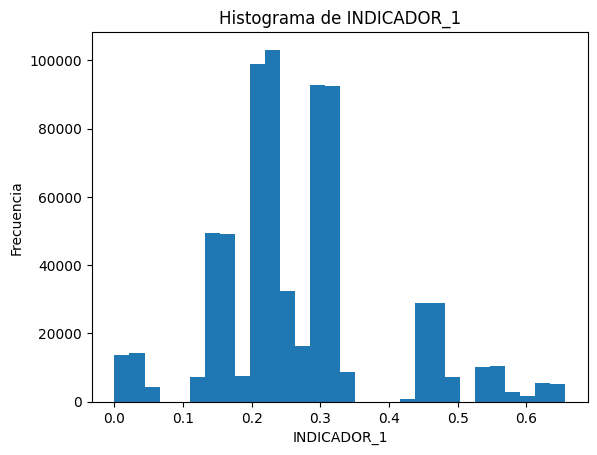

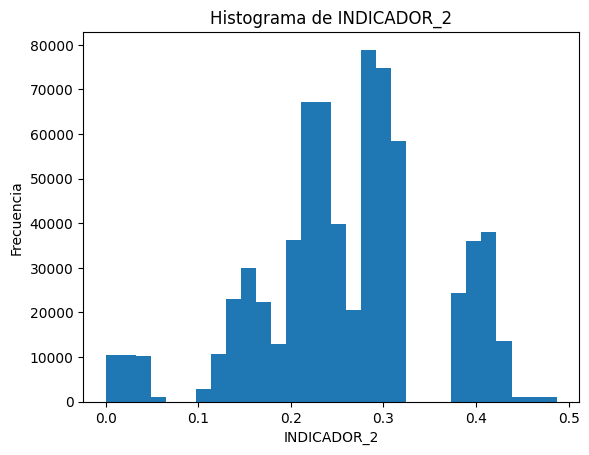

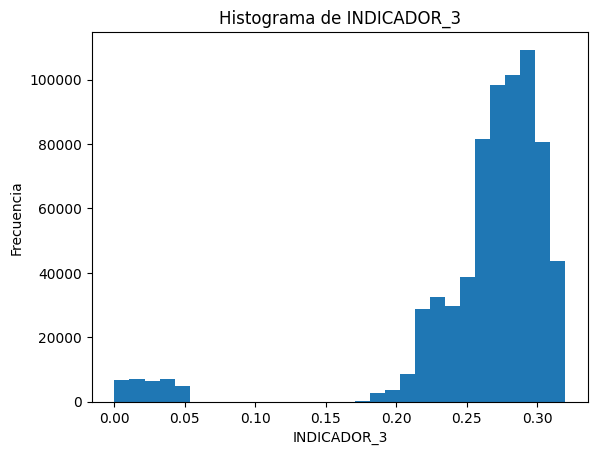

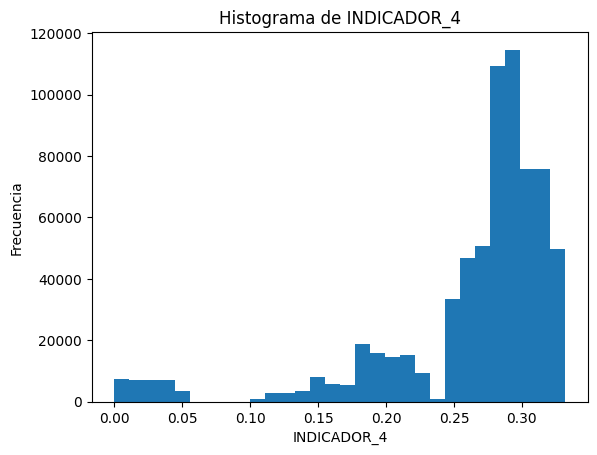

In [21]:
for c in num_cols:
    df[c].plot(kind="hist", bins=30)
    plt.title(f"Histograma de {c}")
    plt.xlabel(c)
    plt.ylabel("Frecuencia")
    plt.show()